# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yoel Mountanus Sitorus
- **Email:** m004d4ky2327@bangkit.academy
- **ID Dicoding:** yoel_mountanus

## Menentukan Pertanyaan Bisnis

- *State* apa yang memiliki index pembelian tertinggi dan sukses terkirim setiap bulannya?
- Bagaimana pengaruh jarak lokasi customer dengan penjual dengan kedatangan barang?

## Import Semua Packages/Library yang Digunakan

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sb

import re
from unidecode import unidecode
from datetime import datetime, timedelta
from math import radians, sin, cos, sqrt, asin

## Data Wrangling

### Gathering Data

In [4]:
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

### Assessing Data

#### Customers Dataset

In [5]:
customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [6]:
customers.isnull().sum() # Tidak ada data NaN / Null

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
customers.duplicated().sum() # Bersih duplikasi

0

#### Geolocation Dataset

In [8]:
geolocation.tail(20)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000143,99930,-27.913659,-52.248615,estação,RS
1000144,99950,-28.073966,-52.010191,tapejara,RS
1000145,99940,-28.056961,-51.857160,ibiaca,RS
1000146,99950,-28.073438,-52.016664,tapejara,RS
1000147,99900,-27.880973,-52.223206,getúlio vargas,RS
1000148,99925,-27.935265,-52.427232,ipiranga do sul,RS
1000149,99900,-27.882555,-52.222879,getulio vargas,RS
1000150,99950,-28.069025,-52.011170,tapejara,RS
1000151,99930,-27.913772,-52.256843,estacao,RS
1000152,99900,-27.883377,-52.221856,getulio vargas,RS


In [9]:
geolocation.geolocation_city.unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [10]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [11]:
geolocation.duplicated().sum() # Banyak duplicate

261831

#### Order: Items Dataset

In [12]:
order_items.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [13]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
order_items.duplicated().sum() # Banyak duplicate

0

#### Order: Payments Dataset

In [15]:
order_payments.head(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [16]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [17]:
order_payments.duplicated().sum() # Banyak duplicate

0

#### Order: Reviews Dataset

In [18]:
order_reviews.head(20)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [19]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [20]:
order_reviews.duplicated().sum() # Banyak duplicate

0

#### Orders Dataset

In [21]:
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [22]:
def str_to_datetime(date: str | np.float64):
    if type(date) == float:
        return str_to_datetime("2000-01-01 00:00:00")
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

a = str_to_datetime("2017-01-23 18:29:09") - str_to_datetime("2017-01-22 18:29:09")
print(a)

1 day, 0:00:00


In [23]:
order_analysis = orders.dropna(subset=['order_approved_at'])
order_analysis["purchase_to_approve"] = orders["order_approved_at"].apply(str_to_datetime) - orders["order_purchase_timestamp"].apply(str_to_datetime)

C:\Users\WIN-11\AppData\Local\Temp\ipykernel_5988\2602075141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_analysis["purchase_to_approve"] = orders["order_approved_at"].apply(str_to_datetime) - orders["order_purchase_timestamp"].apply(str_to_datetime)


In [24]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [25]:
order_analysis.purchase_to_approve.describe()
# a = str_to_datetime("2017-01-23 18:29:09") + order_analysis.purchase_to_approve[0]
# print(type)

count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
Name: purchase_to_approve, dtype: object

In [26]:
# orders[orders["order_approved_at"].isna()].apply()

In [27]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
len(orders[orders.order_status == "invoiced"])

314

In [29]:
orders.duplicated().sum() # Banyak duplicate

0

#### Product Category Name Translation

In [30]:
product_category_name_translation.tail(20)

,product_category_name,product_category_name_english
51,fashion_esporte,fashion_sport
52,sinalizacao_e_seguranca,signaling_and_security
53,pcs,computers
54,artigos_de_natal,christmas_supplies
55,fashion_roupa_feminina,fashio_female_clothing
56,eletrodomesticos_2,home_appliances_2
57,livros_importados,books_imported
58,bebidas,drinks
59,cine_foto,cine_photo
60,la_cuisine,la_cuisine


In [31]:
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
product_category_name_translation.duplicated().sum() # Banyak duplicate

0

#### Products Dataset

In [33]:
products.head(20)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [34]:
# Tambahin Outlier - IQR Method

In [35]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
products.duplicated().sum() # Banyak duplicate

0

#### Seller Dataset

In [37]:
sellers.head(20)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [38]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [39]:
sellers.duplicated().sum()

0

### Cleaning Data

#### 1. Customers Cleaning (Sudah Bersih)

#### 2. Geolocation Cleaning
Pada bagian ini dilakukan:
1. Melakukan drop duplikasi data
2. melakukan standarisasi data dengan mengubah char unik seperti "são paulo" menjadi "sao paulo"

In [40]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [41]:
geolocation = geolocation.drop_duplicates()

In [42]:
geolocation.duplicated().sum()

0

In [43]:
geolocation.geolocation_city.value_counts()

geolocation_city
sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: count, Length: 8011, dtype: int64

In [44]:
non_latin = geolocation[geolocation['geolocation_city'].str.contains(r'[^\x00-\x7F]', case=False)]
non_latin.geolocation_city.value_counts()
# Punya banyak huruf non latin, kita standarisasi ke latin normal

geolocation_city
são paulo                     19718
brasília                       1872
são bernardo do campo          1183
santo andré                    1026
goiânia                         905
                              ...  
são félix do piauí                1
são miguel da baixa grande        1
novo santo antônio                1
boa esperança do iguaçu           1
gororós                           1
Name: count, Length: 2085, dtype: int64

In [45]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(unidecode)

In [46]:
geolocation.geolocation_city.value_counts()

geolocation_city
sao paulo                  99645
rio de janeiro             35177
belo horizonte             19474
curitiba                   11263
brasilia                    8791
                           ...  
cachoeira de santa cruz        1
quixaba                        1
curumim                        1
xangrila                       1
bento fernandes                1
Name: count, Length: 5969, dtype: int64

#### 3. Order: Items Cleaning (Sudah Bersih)

#### 4. Order: Payments Cleaning (Sudah Bersih)

#### 5. Order: Reviews Cleaning (Not Necessary to Clean)

#### 6. Orders Cleaning (Not Necessary to Clean bruh)

#### 7. Product Category Name Translation (Sudah Bersih)

#### 8. Products Cleaning

#### 9. Sellers Cleaning

## Exploratory Data Analysis (EDA)

### Explore ...

#### Pertanyaan #1
**Pertanyaan**: *state* apa yang memiliki index order pembelian dan sukses terkirim tertinggi setiap bulannya? \
hal yang dilakukan:
1. Melakukan merge table order dengan table customer sehingga mampu mendapatkan data lokasi state
2. Membuat kolom tahun dan bulan dari tanggal kapan customer melakukan pembelian barang
3. Lalu melakukan filtering sehingga mendapatkan order dengan status delivered saja
4. Ambil kolom yang diperlukan
5. Lakukan sort berdasarkan year lalu month
6. Lalu mengambil hasil jumlah pembeli pada setiap bulannya dari setiap state yaitu berarti dengan group by "year", "month", dan "customer_state"
7. Setelah mendapatkan jumlah customer dari setiap state setiap bulannya lalu ambil state dengan jumah customer tertinggi setiap bulannya.

In [47]:
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [48]:
# merge / left join orders dengan customer
order_customer = pd.merge(orders, customers, on=['customer_id'], how='left')
# print(order_customer.sum())

In [49]:
print(order_customer.order_status.unique())


# kita perlu mengambil order dengan status approved
order_customer = order_customer[order_customer['order_status'] == "delivered"]

# Ambil column yang diperlukan
order_customer = order_customer[["order_id", "order_status", "order_purchase_timestamp", "customer_city", "customer_state"]]
order_customer.order_purchase_timestamp = order_customer.order_purchase_timestamp.apply(str_to_datetime)

order_customer['year'] = order_customer.order_purchase_timestamp.apply(lambda x: x.year)
order_customer['month'] = order_customer.order_purchase_timestamp.apply(lambda x: x.month)

print(order_customer.order_status.unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
['delivered']


In [50]:
print(order_customer.count(), "\n\n", orders.count())
order_customer.head(10)

order_id                    96478
order_status                96478
order_purchase_timestamp    96478
customer_city               96478
customer_state              96478
year                        96478
month                       96478
dtype: int64 

 order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
dtype: int64


,order_id,order_status,order_purchase_timestamp,customer_city,customer_state,year,month
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,sao paulo,SP,2017,10
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,barreiras,BA,2018,7
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,vianopolis,GO,2018,8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,sao goncalo do amarante,RN,2017,11
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,santo andre,SP,2018,2
5,a4591c265e18cb1dcee52889e2d8acc3,delivered,2017-07-09 21:57:05,congonhinhas,PR,2017,7
7,6514b8ad8028c9f2cc2374ded245783f,delivered,2017-05-16 13:10:30,nilopolis,RJ,2017,5
8,76c6e866289321a7c93b82b54852dc33,delivered,2017-01-23 18:29:09,faxinalzinho,RS,2017,1
9,e69bfb5eb88e0ed6a785585b27e16dbf,delivered,2017-07-29 11:55:02,sorocaba,SP,2017,7
10,e6ce16cb79ec1d90b1da9085a6118aeb,delivered,2017-05-16 19:41:10,rio de janeiro,RJ,2017,5


In [51]:
order_customer.sort_values(by=['year', 'month'], inplace=True)

In [52]:
order_customer.head(10)

,order_id,order_status,order_purchase_timestamp,customer_city,customer_state,year,month
30710,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,sao joaquim da barra,SP,2016,9
378,cbbb524a0e1646aa6cf7a3c0bbe517ad,delivered,2016-10-05 07:31:49,recife,PE,2016,10
699,ac2b7c522d811acba0aa270ed3e112e4,delivered,2016-10-05 15:08:00,leme,SP,2016,10
1384,7033745709b7cf1bac7d2533663592de,delivered,2016-10-04 14:13:22,rio de janeiro,RJ,2016,10
1449,5cd498954e2b37d71b315166809b4bd7,delivered,2016-10-07 00:54:40,rio de janeiro,RJ,2016,10
2335,dc5f6cd4492bbffe5bcda9b87856c9a5,delivered,2016-10-05 13:12:43,pocos de caldas,MG,2016,10
3120,cb2b577a4ebd84bf84ff3990084d490f,delivered,2016-10-05 17:11:49,ibirite,MG,2016,10
3801,3b2ca3293a7ce539ea2379d704fa37ce,delivered,2016-10-05 12:44:09,belo horizonte,MG,2016,10
4472,85841af0d94e5d0cd3a9c0e42e565b74,delivered,2016-10-05 22:39:46,jacarei,SP,2016,10
4514,03ffce741877a000ca0fb3520673d4c4,delivered,2016-10-05 15:17:57,igarassu,PE,2016,10


In [53]:
monthly_order = order_customer.groupby(['year', 'month', 'customer_state']).size().reset_index()
print(monthly_order.count())
monthly_order.head(10)

year              556
month             556
customer_state    556
0                 556
dtype: int64


,year,month,customer_state,0
0,2016,9,SP,1
1,2016,10,AL,1
2,2016,10,BA,3
3,2016,10,CE,6
4,2016,10,DF,6
5,2016,10,ES,3
6,2016,10,GO,7
7,2016,10,MA,4
8,2016,10,MG,35
9,2016,10,MT,1


In [54]:
top_monthly_order = monthly_order.loc[monthly_order.groupby(['year', 'month'])[0].idxmax()]
top_monthly_order.head()

,year,month,customer_state,0
0,2016,9,SP,1
21,2016,10,SP,94
22,2016,12,PR,1
45,2017,1,SP,283
72,2017,2,SP,601


#### Pertanyaan #2
**Pertanyaan**: Bagaimana pengaruh jarak lokasi customer dengan penjual dengan kedatangan barang? \
hal yang dilakukan:
1. melakukan dropna untuk subset 'order_delivered_carrier_date' dan 'order_delivered_customer_date' dari table drop lalu di assign pada variable order_delivered
2. melakukan merge untuk mendapatkan data customer dan seller pada satu table. untuk merge dan mendapatkan data customer cukup simple langsung aja dengan merge on='customer_id'. tetapi untuk seller hasil dari merge sebelumnya di merge dengan order items on = 'order_id' lalu merge dengan sellers table on = 'seller_id'
3. setelah itu pada kolom 'order_delivered_customer_date' dan 'order_delivered_carrier_date' masing masing diubah kedalam bentuk datetime lalu dilakukan pengurangan untuk mendapatkan hasil timedelta yaitu selisih dari waktu sampai pada carrier dengan waktu sampai customer
4. lakukan merge zip_code_prefix dari user dan seller dengan table geolocation sehingga kita mendapatkan titik kira-kira secara latitude dan longitude
5. membuat fungsi harvsine untuk dapat mengkalkulasi jarak antara long-lat customer dengan long-lat seller
6. lalu melihat outline dengan IQR


In [55]:
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [56]:
# Drop row dimana order_delivered_customer_date itu kosong atau dengan status delivered
# order_delivered = orders[orders['order_status'] == "delivered"]
order_delivered = orders.dropna(subset=['order_delivered_carrier_date', 'order_delivered_customer_date'])
order_delivered.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      0
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64

In [57]:
# merge / left join orders dengan customer
order_customer = pd.merge(order_delivered, customers, on=['customer_id'], how='left')
order_customer_item = pd.merge(order_customer, order_items, on=['order_id'], how='left')
order_all = pd.merge(order_customer_item, sellers, on=['seller_id'], how='left')
order_all.head()
# print(order_customer.sum())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752,mogi das cruzes,SP


In [58]:
# Ambil column yang diperlukan
order_all = order_all[["order_id", "order_delivered_carrier_date", "order_delivered_customer_date", "customer_zip_code_prefix", "seller_zip_code_prefix"]]

# ngubah dari text ke datetime
order_all.order_delivered_carrier_date = order_all.order_delivered_carrier_date.apply(str_to_datetime)
order_all.order_delivered_customer_date = order_all.order_delivered_customer_date.apply(str_to_datetime)

order_all['carrier_to_customer'] = order_all['order_delivered_customer_date'] - order_all['order_delivered_carrier_date']

# order_all.head(10)
geolocation_right = geolocation.drop_duplicates(subset='geolocation_zip_code_prefix')
order_with_loc = pd.merge(order_all, geolocation_right, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
order_with_loc = pd.merge(order_with_loc, geolocation_right, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
# order_with_loc.head()

In [59]:
# Haversine untuk menghitung jarak antar lokasi antar long-lat dalam kilometer
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # radius bumi dalam kilometer
    return c * r

In [60]:
order_fix = order_with_loc.dropna(subset=["geolocation_lat_x", "geolocation_lat_y"])

# Pilih kolom yang dibutuhkan saja
order_fix = order_fix[[
    "order_id", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "customer_zip_code_prefix", 
    "seller_zip_code_prefix", 
    "carrier_to_customer", 
    "geolocation_lat_x", 
    "geolocation_lng_x", 
    "geolocation_lat_y", 
    "geolocation_lng_y"
    ]]

order_fix['distance'] = order_fix.apply(lambda x: haversine(x['geolocation_lat_x'], x['geolocation_lng_x'], x['geolocation_lat_y'], x['geolocation_lng_y']), axis=1)
order_fix['geolocation_lng_x'].isna().sum()


0

In [61]:
order_fix.count()

order_id                         109659
order_delivered_carrier_date     109659
order_delivered_customer_date    109659
customer_zip_code_prefix         109659
seller_zip_code_prefix           109659
carrier_to_customer              109659
geolocation_lat_x                109659
geolocation_lng_x                109659
geolocation_lat_y                109659
geolocation_lng_y                109659
distance                         109659
dtype: int64

In [62]:
order_fix.describe()

,order_delivered_carrier_date,order_delivered_customer_date,customer_zip_code_prefix,seller_zip_code_prefix,carrier_to_customer,geolocation_lat_x,geolocation_lng_x,geolocation_lat_y,geolocation_lng_y,distance
count,109659,109659,109659.000000,109659.000000,109659,109659.000000,109659.000000,109659.000000,109659.000000,109659.000000
mean,2018-01-05 09:28:01.922459648,2018-01-14 13:44:02.668235008,35079.160415,24476.430307,9 days 04:16:00.745775540,-21.246890,-46.216241,-22.801603,-47.240210,514.756364
min,2016-10-08 10:34:01,2016-10-11 13:46:32,1003.000000,1001.000000,-17 days +21:41:31,-36.605374,-72.666706,-36.605374,-64.283946,0.000000
25%,2017-09-18 22:23:48,2017-09-26 20:09:53,11092.500000,6429.000000,4 days 01:21:10.500000,-23.591202,-48.125580,-23.611243,-48.831547,160.554863
50%,2018-01-24 19:16:33,2018-02-02 21:26:42,24241.000000,13573.000000,7 days 01:19:34,-22.931016,-46.634516,-23.422313,-46.755211,391.300172
75%,2018-05-08 14:32:00,2018-05-15 20:37:22.500000,58775.000000,27930.000000,11 days 21:36:28,-20.198222,-43.673679,-21.766477,-46.518082,685.814771
max,2018-09-11 19:48:28,2018-10-17 13:22:46,99980.000000,99730.000000,205 days 04:35:00,42.184003,-8.577855,-2.546079,-34.847856,7717.330802
std,NaN,NaN,29889.111194,27632.498075,8 days 14:56:14.025249200,5.570787,4.043429,2.702881,2.342466,477.322466


In [63]:
iqr_distance = order_fix['distance'].quantile(0.75) - order_fix['distance'].quantile(0.25)
print(iqr_distance)

525.2599074318925


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [64]:
top_monthly_order['date'] = pd.to_datetime(top_monthly_order[['year', 'month']].assign(DAY=1))
top_monthly_order.head(50)

,year,month,customer_state,0,date
0,2016,9,SP,1,2016-09-01
21,2016,10,SP,94,2016-10-01
22,2016,12,PR,1,2016-12-01
45,2017,1,SP,283,2017-01-01
72,2017,2,SP,601,2017-02-01
99,2017,3,SP,966,2017-03-01
125,2017,4,SP,873,2017-04-01
152,2017,5,SP,1363,2017-05-01
179,2017,6,SP,1284,2017-06-01
206,2017,7,SP,1543,2017-07-01


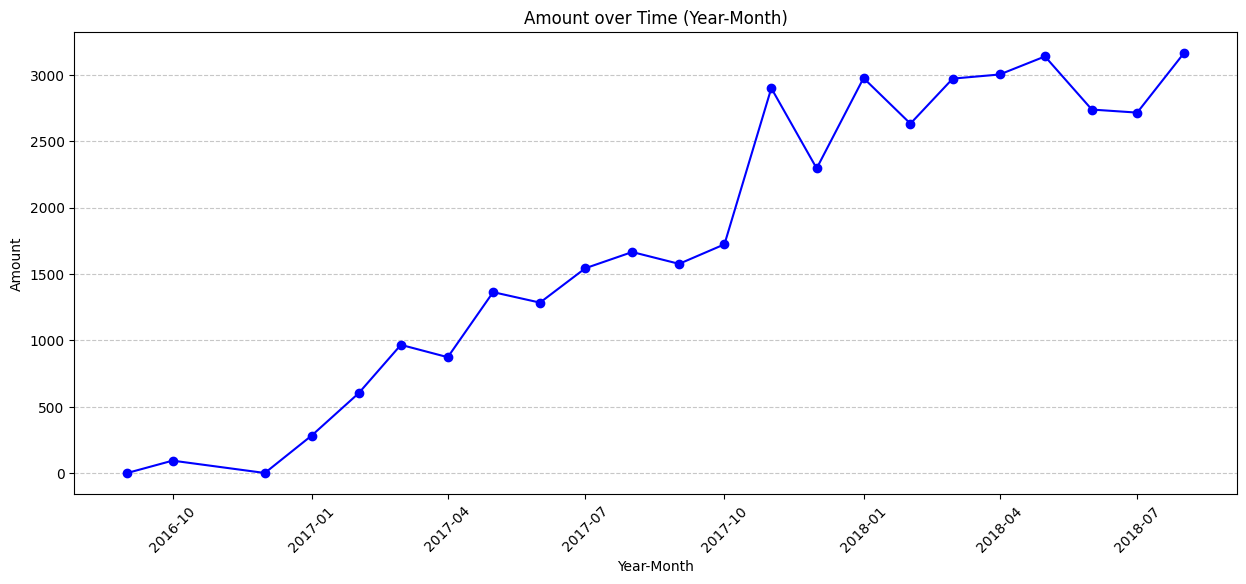

In [65]:
plt.figure(figsize=(15, 6))
plt.plot(top_monthly_order['date'], top_monthly_order[0], marker='o', linestyle='-', color='b')
plt.title('Amount over Time (Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Pertanyaan 2:

C:\Users\WIN-11\AppData\Local\Temp\ipykernel_5988\2817278589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_fix_view["carrier_to_customer"] = order_fix_view["carrier_to_customer"].apply(lambda x: x.total_seconds()/3600)


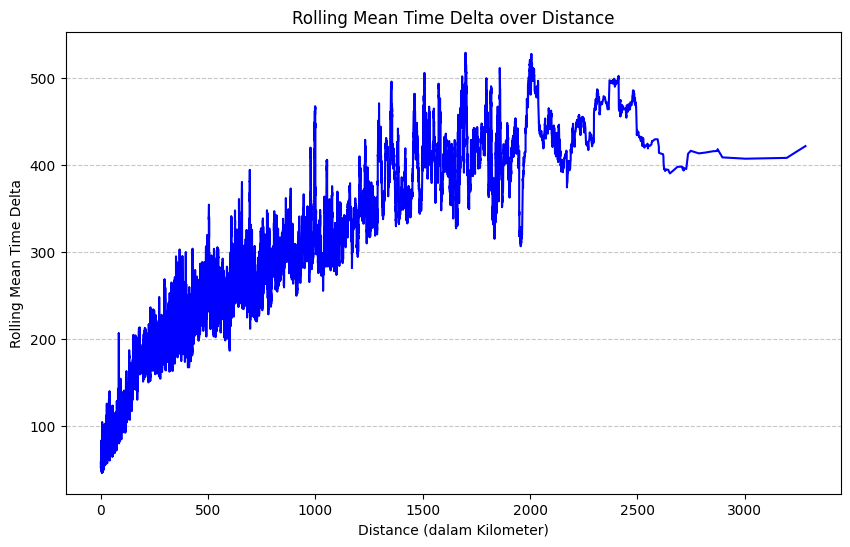

In [108]:
order_fix.sort_values(by='distance', inplace=True)
order_fix = order_fix[order_fix['distance'] < 4000]

order_fix_view = order_fix[["distance", "carrier_to_customer"]]
# order_fix_view.set_index('distance', inplace=True)
order_fix_view["carrier_to_customer"] = order_fix_view["carrier_to_customer"].apply(lambda x: x.total_seconds()/3600)

rolling_mean_timedelta = order_fix_view.rolling(window=100).mean()

plt.figure(figsize=(10, 6))
plt.plot(order_fix_view["distance"], rolling_mean_timedelta["carrier_to_customer"], marker='', linestyle='-', color='b')
plt.title('Rolling Mean Time Delta over Distance')
plt.xlabel('Distance (dalam Kilometer)')
plt.ylabel('Rolling Mean Time Delta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [97]:
order_fix_view.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109653 entries, 0.0 to 3282.4712016041167
Data columns (total 1 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   carrier_to_customer  109653 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


C:\Users\WIN-11\AppData\Local\Temp\ipykernel_5988\2190737949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_fix_view["carrier_to_customer"] = order_fix_view["carrier_to_customer"].apply(lambda x: x.total_seconds()/3600)
C:\Users\WIN-11\AppData\Local\Temp\ipykernel_5988\2190737949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_fix_view["carrier_to_customer"] = rolling_mean_timedelta["carrier_to_customer"]


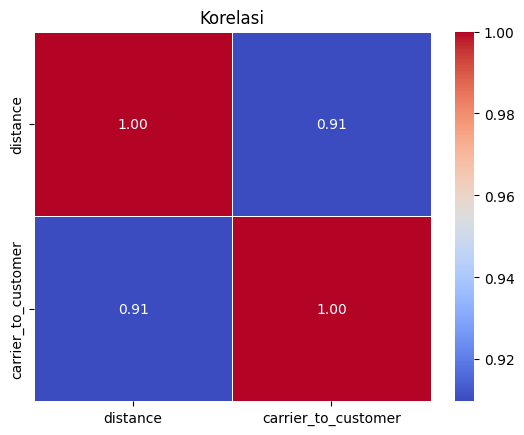

In [110]:
order_fix_view = order_fix[["distance", "carrier_to_customer"]]
# order_fix_view.set_index('distance', inplace=True)
order_fix_view["carrier_to_customer"] = order_fix_view["carrier_to_customer"].apply(lambda x: x.total_seconds()/3600)

rolling_mean_timedelta = order_fix_view.rolling(window=100).mean()

order_fix_view["carrier_to_customer"] = rolling_mean_timedelta["carrier_to_customer"] 

corr = order_fix_view.corr()
heatmap = sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Korelasi')
plt.show()


## Conclusion

- Ini cukup menarik karena kita dapat melihat 2 hal yaitu dari data tersebut kecuali 2016 bulan 9 dan 2016 bulan 11 state SP / Sao Paulo di Brazil selalu menjadi konsumen terbesar, dan dari data tersebut dapat dilihat bahwa setiap bulannya pembelian yang "delivered" naik terus setiap bulannya.
- Dari data hasil visualisasi data yaitu lama pengiriman dengan jarak lalu dilakukan rolling sebanyak 1000 windows lalu dirata-ratakan lalu kita dapat melihat tren naik, semakin jauh jaraknya semakin lama jarak waktu deliverynya. sehingga kita dapat melihat korelasi yang cukup jelas antara jarak dan waktunya. dan memiliki korelasi yang 91%

## Export

In [71]:
orders.to_csv("orders_dataset.csv")
order_items.to_csv("order_items_dataset.csv")
customers.to_csv("customers_dataset.csv")
sellers.to_csv("sellers_dataset.csv")
geolocation.to_csv("geolocation_dataset.csv")

monthly_order.to_csv("monthly_order_dataset.csv")
top_monthly_order.to_csv("top_monthly_order_dataset.csv")
order_fix.to_csv("order_fix_dataset.csv")
